# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
warnings.filterwarnings('ignore')

# 2. Loading the dataset

In [2]:
df = pd.read_csv('heart.csv')

# 3. Exploratory Data Analysis

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
new_columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'rest_ecg', 'thalach', 'exang', 
               'oldpeak', 'slope', 'ca', 'thal', 'target']

In [5]:
df.columns = new_columns

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.shape

(303, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 3.1 Checking for null values

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 3.2 Checking for unique values

In [10]:
unique_number = []

for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = df.columns, columns=['Unique Values'])

,Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


* According to the result from the unique value dataframe;
* We determined the variables with few unique values ​​as categorical variables, and the variables with high unique values ​​as numeric variables.
* In this context, Numeric Variables: “age”, “trtbps”, “chol”, “thalach” and “oldpeak ”
* Categorical Variables: "sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"

### 3.3 Outliers

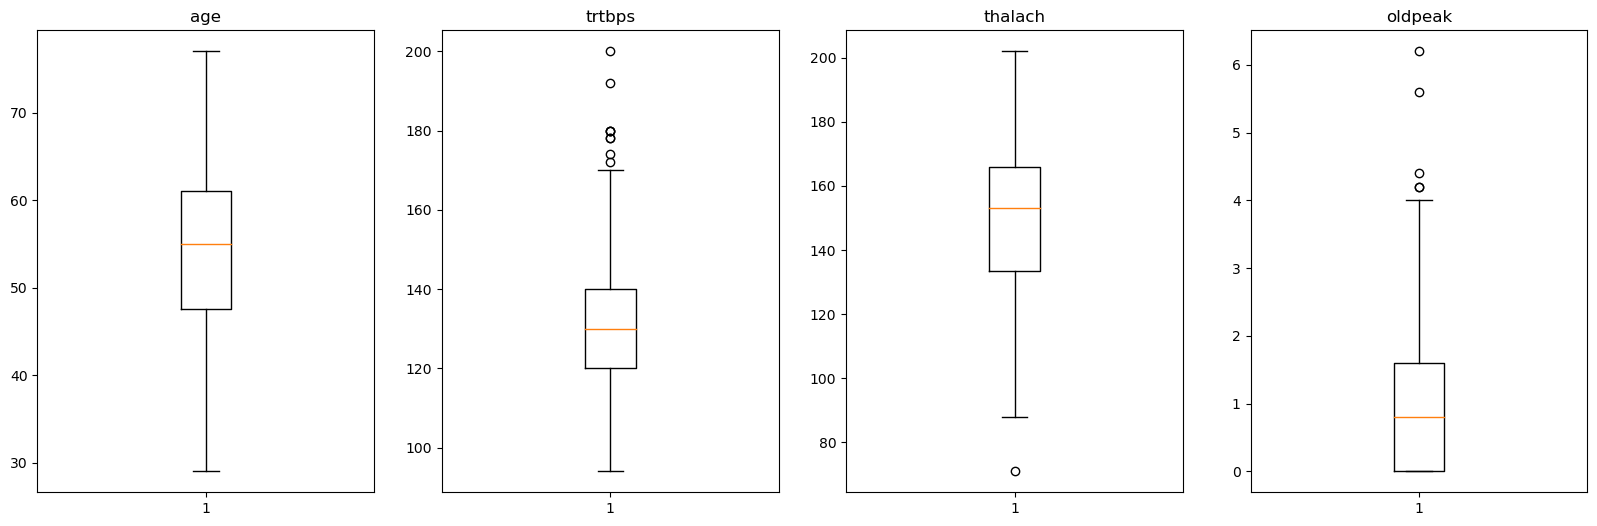

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalach"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

In [12]:
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

### 3.4 Examining Statistics of Variables

In [13]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

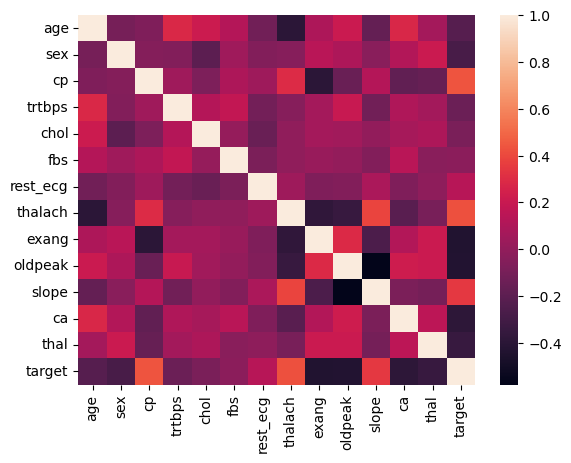

In [14]:
sns.heatmap(df.corr())

### 3.5 Let's Check the skewness of Numeric Features

In [15]:
stats = df[numeric_var].max() - df[numeric_var].min()
(df[numeric_var].mean() - stats)

age          6.366337
trtbps      25.623762
chol      -191.735974
thalach     18.646865
oldpeak     -5.160396
dtype: float64

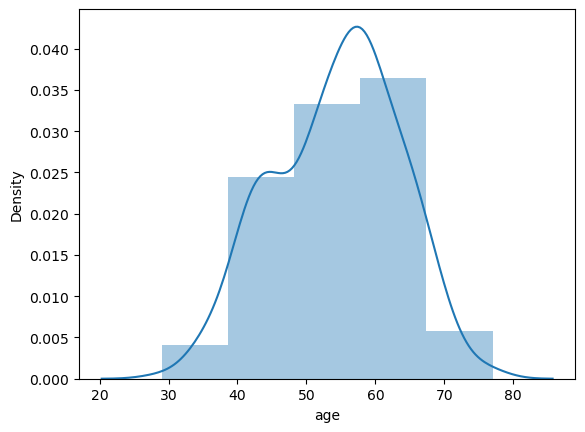

In [16]:
sns.distplot(df["age"], bins = 5);

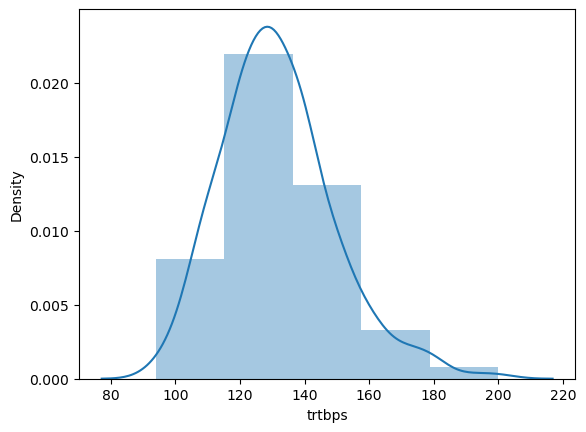

In [17]:
sns.distplot(df["trtbps"], bins = 5);

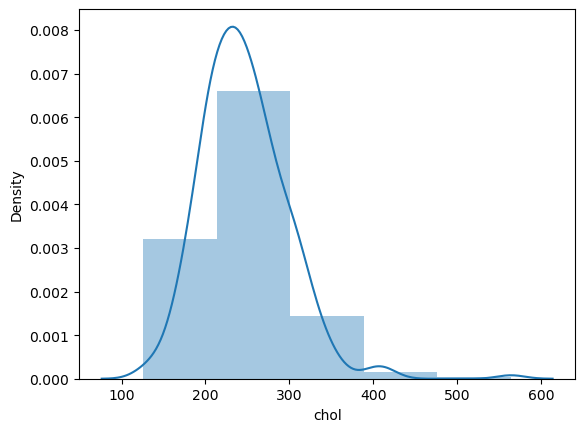

In [18]:
sns.distplot(df["chol"], bins = 5);

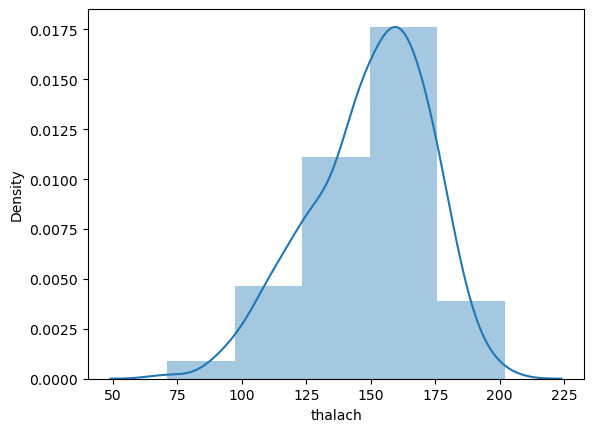

In [19]:
sns.distplot(df["thalach"], bins = 5);

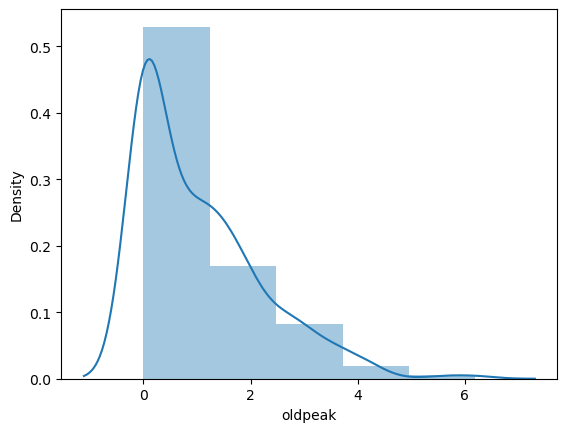

In [20]:
sns.distplot(df["oldpeak"], bins = 5);

### 3.6 Column age, chol, trtbps, thalach, oldpeak are skewed hence we will take log of these columns  

In [21]:
df['age'] = np.log(df['age'])

In [22]:
df['chol'] = np.log(df['chol'])

In [23]:
df['trtbps'] = np.log(df['trtbps'])

In [24]:
df['thalach'] = np.log(df['thalach'])

In [25]:
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thal", "Target"]

In [26]:
# Define colors
colors_sex = ['#FFC0CB', '#808080']  # Light pink, grey
colors_cp = ['#FFC0CB', '#D3D3D3', '#808080', '#A9A9A9']  # Light pink, light grey, grey, dark grey


Text(0.5, 1.0, 'Sex Distribution')

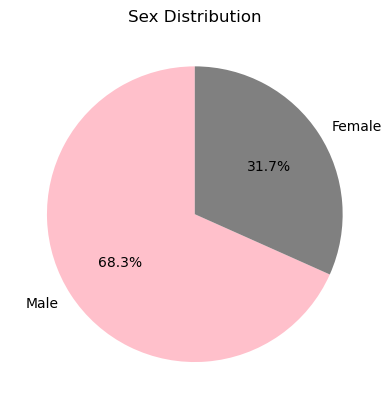

In [27]:
# Calculate counts for 'sex' column
sex_counts = df['sex'].value_counts()
plt.pie(sex_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=colors_sex)
plt.title('Sex Distribution')


In [28]:
# Calculate counts for 'cp' column
cp_counts = df['cp'].value_counts()


In [29]:
# Map chest pain types to their descriptions
cp_mapping = {
    0: 'Asymptomatic',
    1: 'Typical Angina',
    2: 'Atypical Angina',
    3: 'Non-Anginal Pain'
}

Text(0.5, 1.0, 'Chest Pain Type Distribution')

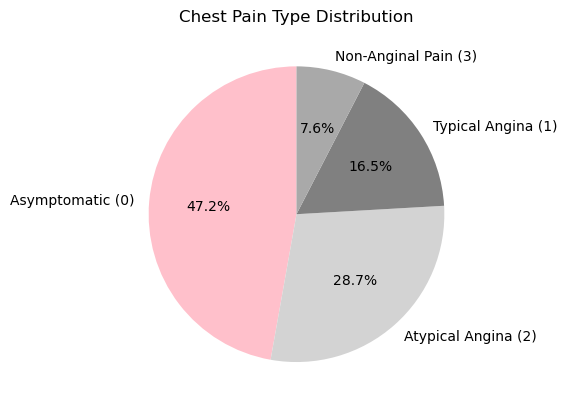

In [30]:
cp_labels = [f'{cp_mapping[key]} ({key})' for key in cp_counts.index]
plt.pie(cp_counts, labels=cp_labels, autopct='%1.1f%%', startangle=90, colors=colors_cp)
plt.title('Chest Pain Type Distribution')

In [31]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [32]:
numeric_var.append("target")

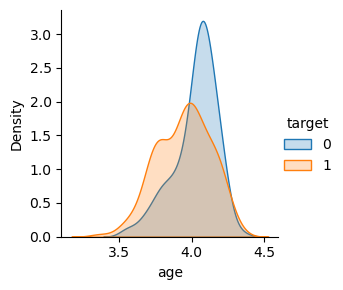

In [33]:
g = sns.FacetGrid(df, hue="target")
g.map(sns.kdeplot, "age", shade = True)
g.add_legend()
# Show the plot
plt.show()

In [34]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,4.143135,1,3,4.976734,5.451038,1,0,5.010635,0,2.3,0,0,1,1
1,3.610918,1,2,4.867534,5.521461,0,1,5.231109,0,3.5,0,0,2,1
2,3.713572,0,1,4.867534,5.318120,0,0,5.147494,0,1.4,2,0,2,1
3,4.025352,1,1,4.787492,5.463832,0,1,5.181784,0,0.8,2,0,2,1
4,4.043051,0,0,4.787492,5.869297,0,1,5.093750,1,0.6,2,0,2,1


<Axes: xlabel='cp', ylabel='count'>

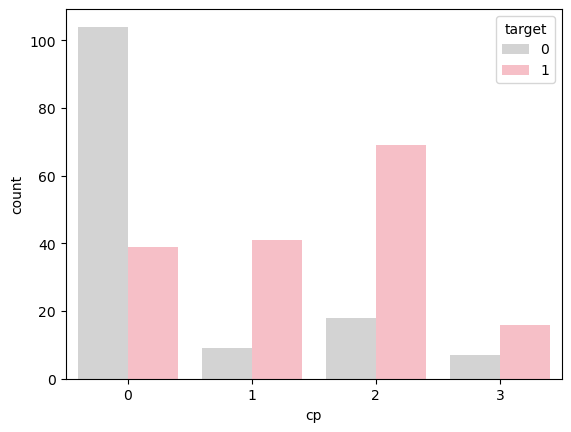

In [35]:
sns.countplot(x="cp", data=df, hue="target", palette=['lightgrey', 'lightpink'])

### 3.6 Extracting features and target

In [36]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# 4. Training and testing dataset

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
X_train.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal
124,3.663562,0,2,4.543295,5.293305,0,1,5.187386,0,0.0,2,0,2
72,3.367296,1,1,4.867534,5.318120,0,0,5.308268,0,0.0,2,0,2
15,3.912023,0,2,4.787492,5.389072,0,1,5.062595,0,1.6,1,0,2
10,3.988984,1,0,4.941642,5.476464,0,1,5.075174,0,1.2,2,0,2
163,3.637586,1,2,4.927254,5.164786,0,1,5.153292,0,0.0,2,4,2


In [40]:
y_train.head()

124    1
72     1
15     1
10     1
163    1
Name: target, dtype: int64

### 4.1 Standardizing the features

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
X_train = scaler.fit_transform(X_train)

In [44]:
X_test = scaler.transform(X_test)

# 5. Model building 

## 5.1 building logistics-regression model

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression()

In [47]:
lr.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred_lr = lr.predict(X_test)

### 5.1.1 checking the accuracy of the model

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
print(round(accuracy_score(y_test, y_pred_lr)*100,2),'%')

80.22 %


### 5.1.2 Fine tuning model

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
parameters = {
                "penalty":["l1","l2"],
                "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
             }

In [53]:
log_reg_grid = GridSearchCV(lr, param_grid = parameters)

In [54]:
log_reg_grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [55]:
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l1', 'solver': 'saga'}


In [56]:
lr_best = LogisticRegression(penalty = "l1", solver = "saga")
lr_best

LogisticRegression(penalty='l1', solver='saga')

In [57]:
lr_best.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='saga')

In [58]:
y_pred_lr_best = lr_best.predict(X_test)

In [59]:
accuracy_L= accuracy_score(y_test, y_pred_lr_best)
print(round(accuracy_L*100,2),'%')

81.32 %


In [60]:
precision_L= precision_score(y_test, y_pred_lr_best)
precision_L

0.8235294117647058

In [61]:
recall_L=recall_score(y_test, y_pred_lr_best)
recall_L

0.84

## 5.2 Building decision tree classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dec_tree = DecisionTreeClassifier(random_state = 5)

In [64]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [65]:
y_pred_dt = dec_tree.predict(X_test)

### 5.2.1 Checking the accuracy

In [66]:
print(round(accuracy_score(y_test, y_pred_dt)*100,2),'%')

73.63 %


### 5.2.2 Fine tuning model

In [67]:
param_grid = {
    'max_depth': [None, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [68]:
dec_tree_ft = GridSearchCV(dec_tree, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

In [69]:
dec_tree_ft.fit(X_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [85]:
print('Best Parameters: ',dec_tree_ft.best_params_)

Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [86]:
dec_tree_best = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=4, min_samples_split=2)

In [87]:
dec_tree_best.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4)

In [88]:
y_pred_dt_best = dec_tree_best.predict(X_test)

In [89]:
accuracy_DT = accuracy_score(y_test, y_pred_dt_best)
print(round((accuracy_DT)*100,2),'%')

75.82 %


In [90]:
precision_DT=precision_score(y_test, y_pred_dt_best)
precision_DT

0.8043478260869565

In [91]:
recall_DT= recall_score(y_test, y_pred_dt_best)
recall_DT

0.74

## 5.3 Building Random Forest model

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
random_forest = RandomForestClassifier(random_state = 5)

In [94]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [95]:
y_pred_rf = random_forest.predict(X_test)

### 5.3.1 Checking the accuracy

In [96]:
print(round(accuracy_score(y_test, y_pred_rf)*100,2),'%')

80.22 %


### 5.3.2 Fine tuning

In [97]:
parameters = {"n_estimators" : [50, 100, 150, 200], 
              "criterion" : ["gini", "entropy"], 
              'max_features': ['auto', 'sqrt', 'log2'], 
              'bootstrap': [True, False]}

In [98]:
random_forest_grid = GridSearchCV(random_forest, param_grid = parameters)

In [99]:
random_forest_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [100]:
print("Best Parameters:", random_forest_grid.best_params_)

Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 50}


In [101]:
random_forest_best = RandomForestClassifier(bootstrap = True, criterion = "entropy", max_features = "sqrt", n_estimators = 50, random_state = 5)

In [102]:
random_forest_best.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=5)

In [103]:
y_pred_rf_best = random_forest_best.predict(X_test)

In [104]:
accuracy_RF=accuracy_score(y_test, y_pred_rf_best)
accuracy_RF

0.7912087912087912

In [105]:
precision_RF=precision_score(y_test, y_pred_rf_best)
precision_RF

0.8163265306122449

In [106]:
recall_RF= recall_score(y_test, y_pred_rf_best)
recall_RF

0.8

# 6. Model Comparision

## 6.1 Comparing accuracy

In [107]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_scores = [accuracy_L,
                   accuracy_DT,
                   accuracy_RF]

(0.0, 1.0)

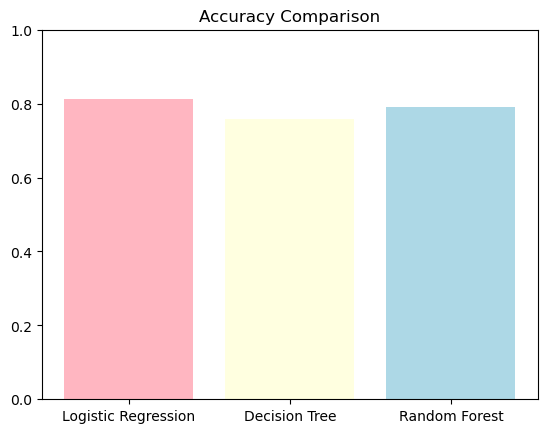

In [108]:
# Accuracy comparison
plt.bar(models, accuracy_scores, color=['lightpink', 'lightyellow', 'lightblue'])
plt.title('Accuracy Comparison')
plt.ylim([0, 1])

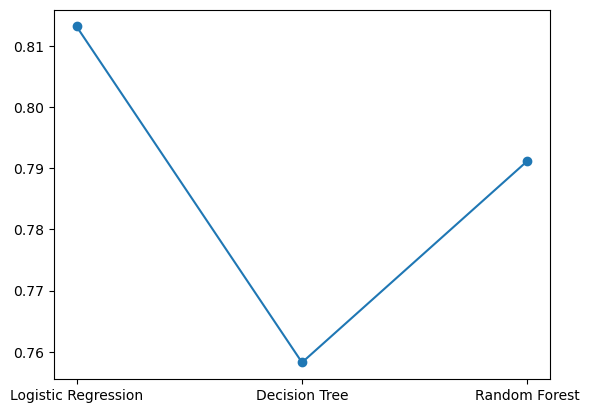

In [109]:
# Accuracy comparison
plt.plot(models, accuracy_scores, marker='o', label='Accuracy')


## 6.2 Comparing precision score

In [110]:
precision_scores = [precision_L,
                    precision_DT,
                    precision_RF]

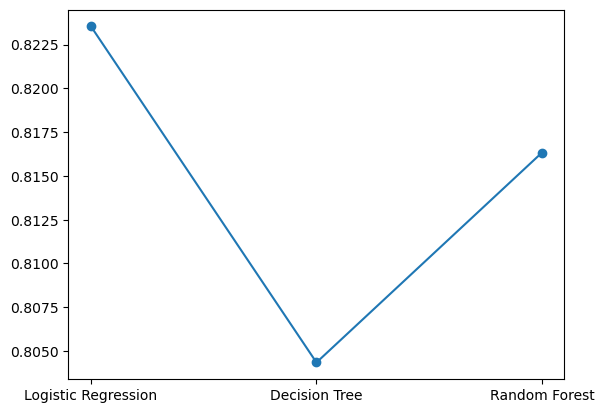

In [112]:
# Precision comparison
plt.plot(models, precision_scores, marker='o', label='Precision')


## 6.3 Comparing recall score

In [113]:
recall_scores = [recall_L,
                 recall_DT,
                 recall_RF]

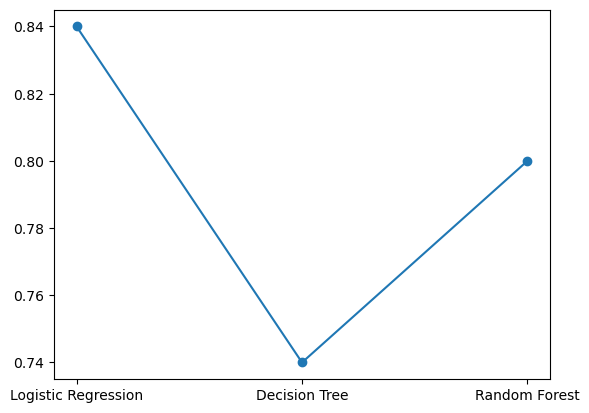

In [114]:
# Recall comparison
plt.plot(models, recall_scores, marker='o', label='Recall')


## 6.4 ROC curve

### 6.4.1 ROC for Logistics Regression

In [115]:
## Probability for positive class

y_prob_lr = lr_best.predict_proba(X_test)[:,1]

In [116]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)

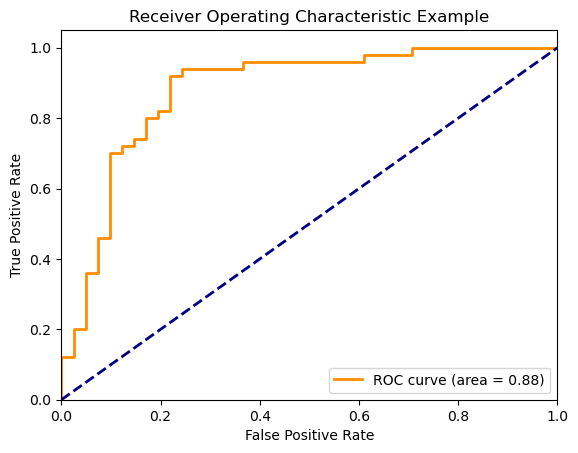

In [117]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob_lr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

### 6.4.2 ROC for Decision Tree

In [118]:
## Probability for positive class

y_prob_dt = dec_tree_best.predict_proba(X_test)[:,1]

In [119]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)

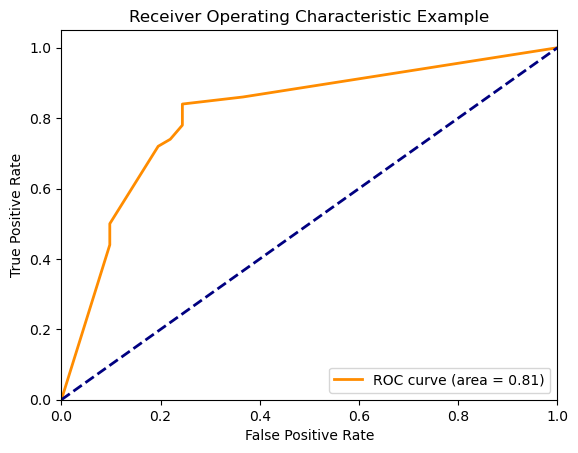

In [120]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

### 6.4.3 ROC for Random Forest

In [121]:
## Probability for positive class

y_prob_rf = random_forest_best.predict_proba(X_test)[:,1]

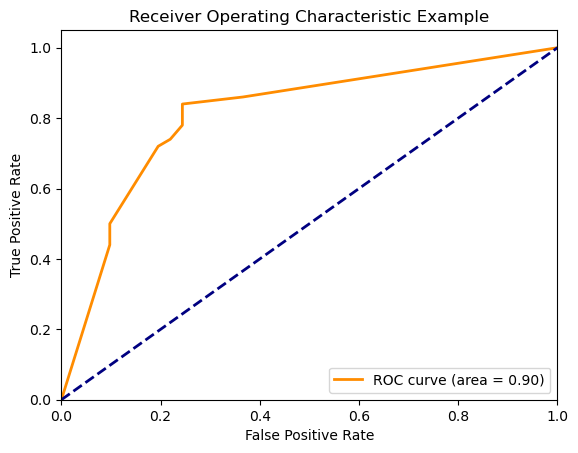

In [122]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()